# Abstract:

Building off of my first talk, I will couple linear algebra and calculus to introduce the idea of the *cost function* along with the simple technique of linear regression. We'll then revisit eigenvectors and values while briefly describing how to systematically find them. The Google Page Rank algorithm will also be shown again, this time with the numerical calculations of finding the eigenvector associated with $\lambda = 1$. From there, we'll touch on the singular value decomposition (SVD), one of the most important linear algebraic tools given its utility for dimensionality reduction and look at image compression using the technique.  When reading, a "*" in the title of a section denotes an important concept(s)— the takeaway. Two ** means it's a less important and likely focuses on the minutiae of the topic at hand. The hopeful takeaway of each of these sections can be found below. 

#### $\S 1$: Linear Regression
We can perform linear regression by solving a system of equations to find the optimal weights:
$$\hat{X}^T \hat{X} \vec{\omega} = \hat{X}^T \vec{y} $$

Where $\hat{X}, \hat{X}^T$ are matrices containing your basis of choice, $\vec{\omega}$ is a vector with the weights for each order of the basis, and $\vec{y}$ is the data you have. 

Recall that a capital letter with a hat is a matrix (i.e. $\hat{X} \in \mathbb{R}^{m \times n}$) while a lowercase letter with an arrow denotes a vector (i.e. $\vec{v} \in \mathbb{R}^n$). 

#### $\S 2$: Eigenvectors and Eigenvalues Revisited
The general eigen equation:
$$ \hat{A} \vec{v} = \lambda \vec{v} $$
Here, $\vec{v}$ represents an eigenvector of $\hat{A}$ and $\lambda$ the associated eigenvalue. In the body of the actualy text, I'll write an eigenvector with a particular eigenvalue as $\vec{v}_{\lambda = \alpha}$ where $\alpha$ is some real scalar. To systematically find $\lambda$ before $\vec{v}_{\lambda}$, we use the following relationship:

$$det(A - \lambda I) = \vec{0}$$
Once we find all $\lambda$, we determine the nullspace of the matrix resulting from $\hat{A} - \lambda I$ to find $\vec{v}_{\lambda}$.

Scalars will be typically be denoted by a greek letter, or some letter without headgear and subscripts. It should hopefully be clear based on context or I'll explicitly state it.

#### $\S 3$: Singular Value Decomposition (SVD)
SVD is a factorization of some matrix $\hat{A}$ that works even if $\hat{A}$ is not symmetric nor square:

$$ \hat{A} = \hat{U} \hat{\Sigma} \hat{V}^T $$

$\hat{A}$ = $m \times n$ matrix 

$\hat{U}$ = $m \times m$ orthogonal matrix 

$\hat{V}$ = $n \times n$ orthogonal matrix 

$\hat{\Sigma}$ = $m \times n$ diagonal matrix whose $ith$ diagonal entry is the $ith$ singular value, $\sigma_i$




## $\S 0$: Review

#### $\S 0.a$: Linear Algebra Procedures:
Matrix and vector addition proceeds element-by-element. 

$$ \vec{a} + \vec{b} = \begin{bmatrix} a_1 + b_1 \\ a_2 + b_2 \\ \vdots \\ a_n + b_n \end{bmatrix} $$
Here, we see it's necessary for the vectors to have the same number of entries for the procedure to be defined. Subtraction works the same way, just flipping the sign of each element in the second vector. 

Matrix multiplication isn't quite as intuitive, however we showed how it arises naturally when one considers representing a system of equations using matrices and vectors, and how one can recover that system through matrix multiplication. The formula is as follows:

$$ \sum_j A_{ij} B_{jk} = C_{ik} $$
Here, the first subscript corresponds to the number of rows while the second describes the number of columns. Since we sum along *j*, we see that the first matrix must have the same number of columns as the second one has rows. Pictorially, we can see it below:

<center>
<img src="matmul.png" width="500">
</center>

#### $\S 0.b$: Matrix Forms:

When considering a system of equations, the nicest case is having an equal number of equations and unknowns. When making your augmented matrix, this will ideallylead to a very clean **row-reduced echelon form** in which there matrix is diagonal with all 1's, thus there's no need for back substitution.


<center>
<img src="rref.png" width="600">
</center>

Here, the blue elements along the diagonal refer to what's called a **pivot**. Somewhat formally, a pivot is the first non-zero entry in a row if the matrix is in a row (reduced) echelon form. The most important reason to denote these is because in math, there's a joke that the only numbers are 0, 1, and $\infty$ denoting *existence* and *uniqueness*. In this case, the number of pivots matches the number of rows, thus we have **one solution**.

<center>
<img src="freevar.png" width="570">
</center>

In this example, we have two pivots but three rows. The numbers in green are referred to as **free variable** while the items in blue are still pivots. The implication of having free variables is we don't have enough information to exactly solve the system of equations. More precisely, we have more unknowns than equations, so how could we possibly solve it exactly?! We cannot, so there are an infinite number of solutions. 

## $\S 1$: Linear Regression *
Linear regression is a great starting point for understanding how linear algebra and optimization are used in data analytics. 

The form of a simple linear regression model is given as:

$y = mx + b + \varepsilon$

where the $y$ is the dependent variable, $x$ is the independent variable, $m$ is the slope of the line, $b$ is the intercept, and $\varepsilon$ is the "error" between the model and the actual data. This can also be written with indices on the data:

$y_i = mx_i + b + \varepsilon_i \longrightarrow y_i = \underbrace{f(x_i)}_{\text{cont. func}} + \underbrace{\varepsilon_i}_{\text{error}}$

where $i$ refers to the index of the data point (e.g. the first, second, third, ... ith data point). We can also think of these quantities as vectors:

$\vec{y} = m\vec{x} + b + \vec{\varepsilon}$  

We can easily visualize this vectoral form in Python:

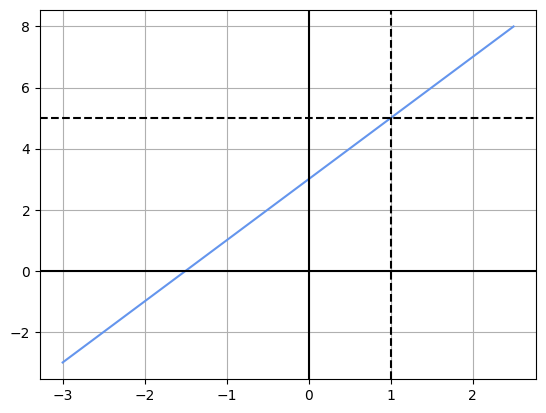

In [69]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.5)
# print(x)

m = 2
b = 3

y = m*x + b

plt.plot(x, y, color = 'cornflowerblue') # here, m*x is scalar multiplication, so each element in x is multplied by m
# adding b is mathematically illegal as the size of b and x don't line up, but programming is kind, treating it as b added to each element in x
plt.axvline(0, color = 'k')
plt.axhline(0, color = 'k')
plt.axhline(5, color = 'k', linestyle = '--')
plt.axvline(1, color = 'k', linestyle = '--')
plt.grid("show")
plt.show()

We can actually make this procedure of creating a domain (i.e. the x-values and their spacing) then creating an output from it (y) more elegant using an inner product (matrix-vector multiplication here) and what's called a **Vandermonde Matrix**. The Vandermonde Matrix contains the **polynomial basis** of order n which you can use the fit your data. What do I mean by a basis? Let's consider the following:

$$ f(x) = x^2 + x + 1 $$

If you were to guess at what polynomials of different order you could add together to produce the above function $f(x)$, what would you guess? I hope a fairly natural response would be $x^2$ + $x^1$ + $x^0 = 1$. Now, things get a bit more complicated if you add coefficients:

$$ f(x) = 5x^2 + 12x + \pi \cdot 1 $$

What polynomial basis would you use to produce the function above? Similarly to the previous example, I'd pick $5 \cdot x^2$ + $12 \cdot x^1$ + $\pi \cdot x^0 $. Of course, it's easiest to have the your polynomial basis having coefficients of all 1's, so that's how we keep it. Instead we generalize picking a polynomial bases up to a specific order, and we choose coeffients as need:

$$ f(x) = w_0 \cdot 1 + w_1 \cdot x + w_2 \cdot {x}^2 + ... $$

If discrete:

$$ f(\vec{x}) = \vec{y} = w_0 \cdot \vec{x}^0 + w_1 \cdot \vec{x}^1 + w_2 \cdot\vec {x}^2 + ... $$

As mentioned above, we can easily accomplish this by creating a Vandermonde Matrix:

$$ \hat{V} = \hat{V}(x_0, x_1, ..., x_m) = \begin{bmatrix}
    1 & x_0 & x_0^2 & ... & x_0^n \\
    1 & x_1 & x_1^2 & ... & x_1^n \\
    1 & x_2 & x_2^2 & ... & x_2^n \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_m & x_m^2 & ... & x_m^n
\end{bmatrix} $$

and a vector housing our **weights**, the respective $w_i$

$$ \begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_i
\end{bmatrix}$$

This looks like a lot, but we can see that **across a row**, our x value remains at the same input $x_n$ while the order associated with it grows. Down a column, we change our x input while the order remains the same. Once we've made this matrix, we would then multiply it by a column vector containing the weights for our polynomial basis. Let's re-create the plot above using this method.

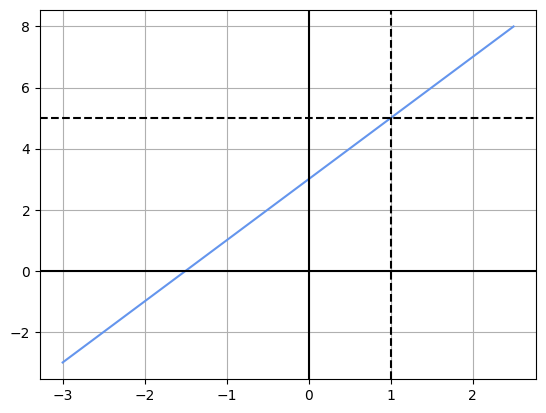

(12, 2)


In [70]:
x = x.reshape(-1, 1)  #make the x vector from the above cell into a column vector
X = np.hstack((x**0, x)) # create the Vandermonde matrix; x^0 = 1 becomes the first column while x^1 = x becomes the second column
w = [b, m] # create a vector with the "weights" from above
y = X@w # matrix multiplication

plt.plot(x, y, color = 'cornflowerblue') # here, m*x is scalar multiplication, so each element in x is multplied by m
# adding b is mathematically illegal as the size of b and x don't line up, but programming is kind, treating it as b added to each element in x
plt.axvline(0, color = 'k')
plt.axhline(0, color = 'k')
plt.axhline(5, color = 'k', linestyle = '--')
plt.axvline(1, color = 'k', linestyle = '--')
plt.grid("show")
plt.show()

print(X.shape)

Let's get a qualitative grasp on what's happening here. The Vandermone matrix for a line looks as follows. $x_0$ corresponds to `x[0]`, $x_1$ to `x[1]`, so on and so on.

$$ \hat{V} = \begin{bmatrix}
    1 & x_0 \\
    1 & x_1 \\
    1 & x_2\\
    \vdots & \vdots \\
    1 & x_m 
\end{bmatrix} $$

Our vector `w` contains the **weights** for each order of the function, in this case b and m. The y-intercept (b = 3) and slope (m = 2) respectively.

$$ \vec{\omega} = \begin{bmatrix}
     3 \\
     2
\end{bmatrix} $$

The next question we need to ask is if the dimensions make sense for multiplication. $\hat{V}$ has 40 rows and 2 columns while $\vec{\omega}$ has 2 rows and 1 column. Yep, things look good. Now, let's start multiplying.

$$ \vec{y} = \begin{bmatrix}
     1 \times 3 + x_0 \times 2 \\
     1 \times 3 + x_1 \times 2 \\
     \vdots  \\
     1 \times 3 + x_m \times 2 \\
\end{bmatrix} $$

As shown above, this procedure works out how as we'd hope. Now, we cheated a little bit since we already knew the coefficients, and the plot was noise-less. The real world isn't so kind, so how can we generalize this procedure? We'll start by defining a polynomial and adding some noise.

More on statistics [here.](https://statisticsbyjim.com/regression/ols-linear-regression-assumptions/)

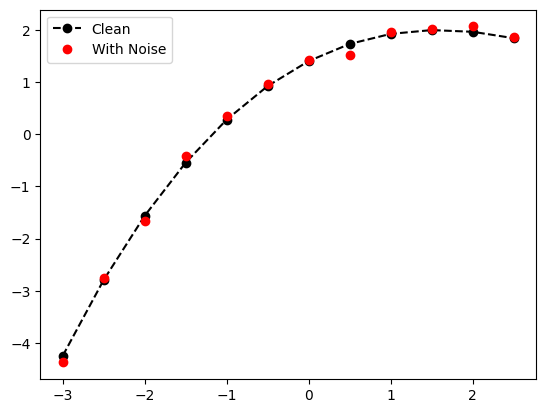

In [71]:
from numpy.random import normal

epsilon = normal(0, 0.1, len(x)) # random chance dictates the error is unbiased, thus the mean must be 0

x = np.arange(-3, 3, 0.5)
x = x.reshape(-1, 1) #make x into a column vector
w = [1.4, 0.8, -0.3, 0.02]

X = np.hstack((x**0, x, x**2, x**3))
y = X@w 

plt.plot(x, y, '--ok', label = "Clean")
y_noise = y + epsilon
plt.plot(x, y_noise, 'or', label = 'With Noise')
plt.legend()
plt.show()

### $\S 3a$: Cost Function *

From the procedure above, we were able to re-write 

$$\vec{y} = m\vec{x} + b + \vec{\varepsilon}$$

as 

$$\vec{y} = \hat{X} \vec{w} + \vec{\varepsilon}$$
where $\hat{X}$ is the Vandermonde matrix and $\vec{w}$ is a vector contaning the weights for each order of the function we wish to use. Now, we should define a cost function— a quantification of how much error our model has. The most common cost function denoted by $g$ is the **sum of squared errors** 

$$g = \sum_j \varepsilon_j^2 = \vec{\varepsilon^T} \vec{\varepsilon} \to \vec{\varepsilon} = y_i - f(x_i) = \vec{y} - \hat{X} \vec{\omega}$$

since it alleviates the possibility of positive and negative error getting canceled out. Here, we see $\varepsilon$ is the difference between our data $y_i$ and our model $f(x_i)$. Since these are *discrete* quantities, we treat them as vectors and index them using $i$ once again.

**The goal of linear regression is to use the data $y_i$ and more generally, $\vec{y}$ to produce the best fit line**. First, we must express the cost function in terms of the weights, $\omega_i$

$$ g(\vec{w}) =  \vec{y}^T \vec{y} - \vec{y}^T \hat{X} \vec{w} - (\hat{X} \vec{w})^T \vec{y} + (\hat{X} \vec{w})^T (\hat{X} \vec{w}) $$
Now, recalling calculus, we know we can find the minima of a function with respect to a variable by taking a derivative and setting it equal to 0. Using some matrix calculus, we can show that:

$$\frac{\partial g}{\partial \vec{w}} = \hat{X}^T\hat{X}\vec{w} - \hat{X}^T \vec{y} = 0$$
We rearrange to see that 

$$\hat{X}^T\hat{X}\vec{w} = \hat{X}^T \vec{y} \to \hat{A} \vec{x} = \vec{b}$$
which is just a **linear** system of equations! One that we are well-equipped to solve for the optimal values of ${\omega}_i$. Here, we leverage $\hat{X}^T\hat{X}$ is a matrix that we call $\hat{A}$ while $\hat{X}^T \vec{y}$ produces a vector we call $\vec{b}$. Lastly, we replace $\vec{\omega}$ with $\vec{x}$ as that is most common. Lastly, we'll call our predictions $\hat{y}$ going forward rather than $f(x_i)$, but don't let that confuse you with the convention we've established for matrices. It will still be written with a lowercase letter, so you can distinguish it. Now, let's try it!

Weights from least-squares regression: [ 1.4   0.8  -0.3   0.02]
Original weights to generate data: [1.4, 0.8, -0.3, 0.02]


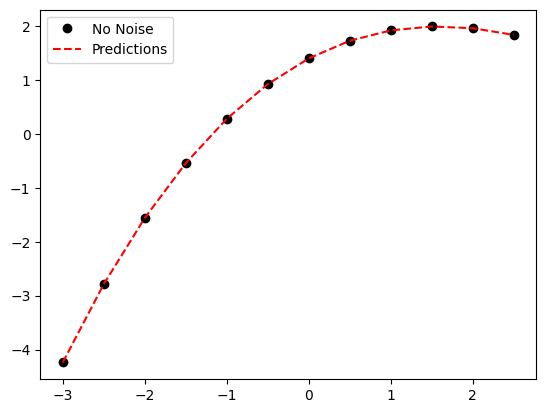

In [72]:
# Let's first start with the "clean data"

A = X.T@X
b = X.T@y 
w_lsr = np.linalg.solve(A,b)
print('Weights from least-squares regression: {}'.format(w_lsr))
print('Original weights to generate data: {}'.format(w))

yhat = X@w_lsr # name of the predictions

plt.plot(x, y, 'ok', label = "No Noise") # noiseless data
plt.plot(x, yhat, '--r', label = "Predictions") #predictions
plt.legend()
plt.show()

A perfect match! How about the noisy data?

Weights from least-squares regression: [ 1.40043259  0.76179811 -0.29633178  0.02965709]
Original weights to generate data: [1.4, 0.8, -0.3, 0.02]


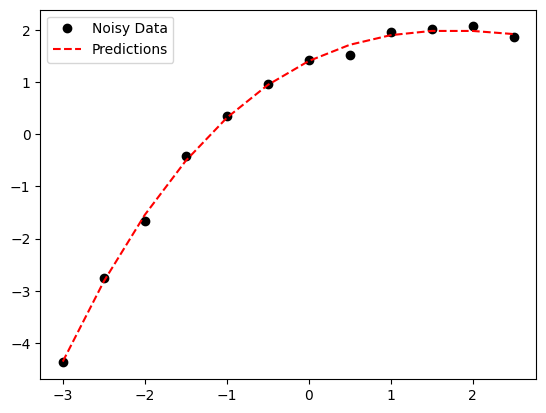

In [73]:
A = X.T@X
b = X.T@y_noise # change this out for y to see if you can recover the clean data
w_lsr = np.linalg.solve(A,b)
print('Weights from least-squares regression: {}'.format(w_lsr))
print('Original weights to generate data: {}'.format(w))

yhat = X@w_lsr

# plt.plot(x, y, 'ob', label = "No Noise") # noiseless data
plt.plot(x, y_noise, 'ok', label = "Noisy Data") # noisy data
plt.plot(x, yhat, '--r', label = "Predictions") #predictions 
plt.legend()
plt.show()

We see that the function doesn't **pass through** each point, instead going between them. This is good, since we don't want to *overfit* the data. Once we have a model, we want it to make accurate predictions, thus memorizing every point of the data isn't helpful as it likely won't generalize to future situations. To see this, let's make a function to create a Vandermonde matrix of arbitrary order, and also see the error as a function of order.

Weights: [ 1.4   0.8  -0.3   0.02]
Sum of Squared Errors (g): 0.1025729734854204


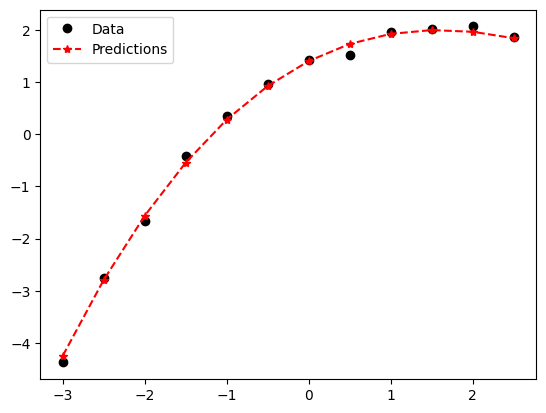

In [74]:
def vandermonde(x, order):
    cols = []
    for i in range(order):
        cols.append(x**i)
    return np.hstack(cols)

order = 4 # note that order = 1 means x^0, order = 2 means mx + b, ...
X_vdm = vandermonde(x, order)
A = X_vdm.T@X_vdm
b = X_vdm.T@y
w_lsr = np.linalg.solve(A,b)

print('Weights: {}'.format(w_lsr))

yhat = X_vdm@w_lsr
SSE = sum((y_noise - yhat)**2) # SSE for noisy data
print('Sum of Squared Errors (g): {}'.format(SSE))

plt.plot(x, y_noise, 'ok', label = "Data")
plt.plot(x, yhat, '--*r', label = "Predictions")
plt.legend()
plt.show()

Text(0, 0.5, 'Error')

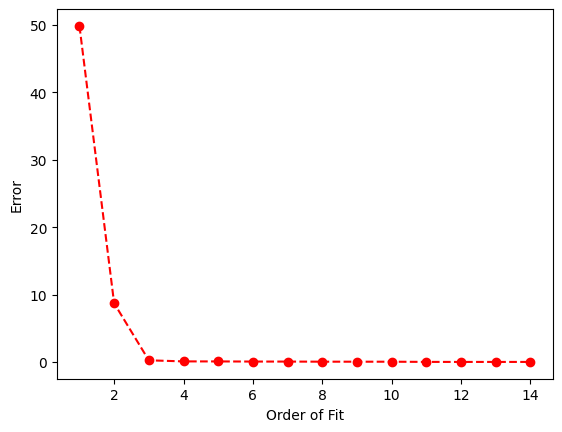

In [75]:
sse = []
orders = range(1,15)
for order_i in orders:
   X_vdm = vandermonde(x, order_i)
   A = X_vdm.T@X_vdm
   b = X_vdm.T@y_noise
   w_lsr = np.linalg.solve(A,b)
   yhat = X_vdm@w_lsr # predicted values
   SSE = sum((y_noise - yhat)**2) #y_noise are the original, noisy values
   sse.append(SSE)

fig, ax = plt.subplots()
ax.plot(orders, sse, '--or')
plt.xlabel('Order of Fit')
plt.ylabel('Error')

### $\S 3b$: Deriving the minimized Cost Function **

For a more thorough walkthrough of finding $g(\vec{\omega})$ and differntiating it, let's start with 

$$g = \sum_j \varepsilon_j^2 = \vec{\varepsilon^T} \vec{\varepsilon}$$

where the sum can be dropped due to how the dot product is defined and 

$$\vec{y} = \hat{{X}}\vec{w} + \vec{\varepsilon} \to \vec{\varepsilon} = \vec{y} - \hat{{X}}\vec{w} $$

Next we substitute this into the loss function

$g = \vec{\varepsilon}^T\cdot\vec{\varepsilon} = (\vec{y} - \hat{{X}}\vec{w})^T(\vec{y} - \hat{{X}}\vec{w})$

Expanding this out:

$$ \vec{y}^T \vec{y} - \vec{y}^T \hat{X} \vec{w} - (\hat{X} \vec{w})^T \vec{y} + (\hat{X} \vec{w})^T (\hat{X} \vec{w}) $$

Using tranpose rules and re-arranging the expression a bit, we can clean this up to produce

$\begin{equation}
g(\vec{\omega}) = \vec{\varepsilon}^T\cdot\vec{\varepsilon} = \vec{w}^T \hat{X}^T \hat{X} \vec{w} - 2 \vec{w}^T \hat{X}^T \vec{y} + \vec{y}^T \vec{y} 
\end{equation}$ 

Before differentiating, there are a few things to define.

#### Vector Differentiation using Index Notation:

I. I will re-write (1) using notation a friend in physics taught me that will hopefully make things a bit more clear:

$ \begin{equation} g(\vec{\omega}) = \vec{w}^T [X]^T [X] \vec{w} - 2 \vec{w}^T [X]^T \vec{y} + \vec{y}^T \vec{y} \end{equation}$

Here, $[X]^T = X_{ij}^{T} = X_{ji}$

II. $ \vec{\omega}^T \vec{\omega} = \sum_i \omega_i \cdot \omega_i$

III. $\frac{\partial f}{\partial \vec{x}} \to \frac{\partial f}{\partial x_{\ell}}$ use a free index (i.e. something that is not summed over and has no relation to the indices denoting rows/columns) as it makes things cleaner and more transparent

IV. $\frac{\partial}{\partial \omega_{\ell}} \omega_i = \delta_{i \ell}$ This $\delta$ means that if with indices means the expression is 1 if the indices match and 0 otherwise. The reason being is that differentiating with respect to a vector is done component by component, so if they don't match up, it's akin to differentiating a constant which would be 0.


With those rules established, we can begin.

$$g(\vec{\omega}) = \vec{\varepsilon}^T\cdot\vec{\varepsilon} =  \vec{w}^T [X]^T [X] \vec{w} - 2 \vec{w}^T [X]^T \vec{y} + \vec{y}^T \vec{y} $$

Converting to index notation:

$$g(\vec{\omega}) = w_i {X_{ij}^T X_{jk}} w_k - 2 {w_i X_{ij}^T y_j} + y_j y_j$$

Here, we write things out imagining we wish to compute these inner products using a loop. The question then becomes how many things to we need to keep track of for matrix multiplication. Well, if we imagine we have $\hat{A} \hat{B}$, we need to keep track of the rows in A, the columns of A, the rows of B, and the columns of B. Based on our definition for matrix multiplication, we know there must be an equal number of columns in A as rows in B, thus we only need one number of keep track of that bit. There is no guarantee, however, that the rows in A will match the columns in B, so we need an index for both of those portions. This means we need indices, and consequently 3 loops to compute this matrix multiplication. As such, we have the indices $i, j, k$ in the line above. Below, I'll show a simple implementation of the matrix multiplication algorithm in Python. 

In [76]:
A_test = np.random.rand(3,3)
B_test = np.random.rand(3, 3)

def matmul_proper(A, B):
    m, n = A.shape # get indices for row, col of A
    p, q = B.shape # get indices for row, col of B
    
    if n != p: # != means "not equal"
        raise ValueError("Matrix Dimensions are Incompatible for Multiplication!")
    
    result = np.zeros((m, q))
    for i in range(m): # loop through each row of left matrix
        for j in range(q): # loop through each col. of right matrix
            for k in range(n): # loop through each col. of left matrix
                result[i,j] += A[i,k] * B[k,j]
    return result

my_results = matmul_proper(A_test, B_test)
check = A_test @ B_test

print(my_results)
print(check)

print(np.isclose(my_results, check))

[[0.68280667 0.84682234 0.92808547]
 [0.45304879 0.56727669 0.56433334]
 [0.75924232 0.79808279 0.82058741]]
[[0.68280667 0.84682234 0.92808547]
 [0.45304879 0.56727669 0.56433334]
 [0.75924232 0.79808279 0.82058741]]
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


Above, we see the presence of a triple for loop, `for i...` `for j...` `for k...` where i, j, k are the indices we use for summing. Below, it's also important to note that the transpose symbol is being restored rather than actually acting on the components meaning that we keep the transpose symbol present even though the indices for matrix multiplication match. 

An example looks like this: $[A]^T [A] \cong A_{ij}^T A_{jk}$. Now, let $[B] = [A]^T \to [B][A] \cong B_{ij} A_{jk}$. Although a bit confusing, we keep the tranpose symbol present, and if we remove it, we transpose the ij components rather than the entirety of the expression when considering conventional matrix rules.

$$g(\vec{\omega}) = w_i {X_{ij}^T X_{jk}} w_k - 2 {w_i X_{ij}^T y_j} + y_j y_j$$

Now, the partial derivative with respect to the $\ell th$ component is $\frac{\partial g}{\partial w_{\ell}}$

Using the product rule: $\frac{d}{dx} [f(x) g(x)] = g(x) \frac{df}{dx}  + f(x) \frac{dg}{dx}$ and the linear nature of the partial differential operator:

$$ \frac{\partial g}{\partial w_{\ell}} =  \frac{\partial g}{\partial w_{\ell}} \left[ w_i X_{ij}^T X_{jk} w_k \right] - \frac{\partial g}{\partial w_{\ell}} \left[2  w_i X_{ij}^T y_j  \right]+ \frac{\partial g}{\partial w_{\ell}} \left[y_j y_j \right]$$ 

$$ \frac{\partial g}{\partial w_{\ell}} =  \delta_{i \ell} X_{ij}^T X_{jk} w_k + w_i X_{ij}^T X_{jk} \delta_{k \ell}  - 2 \delta_{i \ell} X_{ij}^T y_j  + 0 $$

$\delta_{i \ell}$ forces $i \to \ell$, $\delta_{k \ell}$ forces $k \to \ell$, and $\delta_{j \ell}$ forces $j \to \ell$ so we have

$$ \frac{\partial g}{\partial w_{\ell}} =  X_{\ell j}^T X_{jk} w_k + w_i X_{ij}^T X_{j \ell}   - 2 X_{\ell j}^T   y_j $$

Use the rules of transposes:

$$ \frac{\partial g}{\partial w_{\ell}} =  X_{\ell j}^T X_{jk} w_k + X_{\ell j}^T  X_{ji}  w_i   - 2 X_{\ell j}^T   y_j  $$

Setting this equal to 0 and simplifying:

$ \begin{equation}\frac{\partial g}{\partial \vec{\omega}} =  2 [X]^T [X] \vec{\omega}  - 2 [X]^T \vec{y} = 0 \end{equation} $

in our original notation:

$ \begin{equation} \hat{X}^T \hat{X} \vec{\omega}  =  \hat{X}^T \vec{y} \end{equation}$

Consequently, we can solve this as a linearsystem of equations to find the optimal elements for $\vec{\omega}$!

## $\S 2$: Eigenvectors and Eigenvalues *

Defined by the equation:

$$ \hat{A} \vec{v} = \lambda \vec{v} $$

Here, $\vec{v}$ represents an eigenvector of $\hat{A}$ and $\lambda$ the associated eigenvalue. In the body of the actualy text, I'll write an eigenvector with a particular eigenvalue as $\vec{v}_{\lambda = \alpha}$ where $\alpha$ is some real scalar. An arbitrary eigenvector will be denoted as $\vec{v}_{\lambda}$ (i.e. missing a specified scalar).

### Systematically Finding $\lambda$ and $\vec{v}_{\lambda}$ **

From the equation above, let's consider how we might find the $\vec{v}_{\lambda}$ of an associated matrix. A good first step would be to get everything on one side.

$$ \hat{A} \vec{v} -  \lambda \vec{v}  = \vec{0}$$

Let's now "factor" out $\vec{v}$.

$$ (\hat{A} -  \lambda)\vec{v}   = \vec{0}$$
As mentioned above, the dimensions of things in linear algebra must match, so a matrix minus a scalar is an undefined operation. To remedy this, we can multiply $\lambda$ by $\hat{I}$, the identity matrix whose dimensions match $\hat{A}$. The reason being is that multiplication by $\hat{I}$ is the same thing as multiplying by 1; it leaves things unchanged.

$$ (\hat{A} -  \lambda \hat{I}) \, \vec{v}   = \vec{0}$$
From here, we can see a *trivial* solution to this equation is if $\vec{v} = \vec{0}$, a vector in which all its elements are 0. The reason we call this trivial is that it's technically an eigenvector for every square matrix, so it's uninteresting to the point where we disqualify it from even being an eigenvector. This is not to be confused, however, with having 0 as an eigenvalue. That is totally fine.

Here is where things get interesting. Let's imagine some matrix inverse, $\hat{B} = (\hat{A} -  \lambda \hat{I})^{-1} $ exists. If this were true, we could multiply both sides by $\hat{B}$ to then get $\vec{v} = \vec{0}$, which is the only possible solution. The reason being any matrix multiplied by the zero vector returns the zero vector. Given this result, we want to find the condition(s) where $(\hat{A} -  \lambda \hat{I})^{-1} $ **does not** exist. If you've taken linear algebra before, or if you refer to the above, cherry-picked rules, you might notice that if the determinant of a matrix is 0, it means its inverse does not exist. Consequently, we change things to find where $ det (\hat{A} - \lambda \hat{I}) =0$.

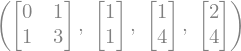

In [84]:
from sympy import *
init_printing(use_unicode=True)


A = np.random.randint(5, size = 4).reshape(2,2)
c = np.random.randint(5, size = 2).reshape(2,1)
v = np.array([1, 1])

A_sym = Matrix(A)
c_sym = Matrix(c)
v_sym = Matrix(v)

w = A @ v

A_sym, v_sym, A_sym*v_sym, c_sym # sympy matrix multiplication works using "*"

Matrix: 
 [[0 1]
 [1 3]]
Initial Vector: [1 1]
New Vector: [1 4]
Non-Matmul Product: 
 [[ 0  2]
 [ 4 12]]


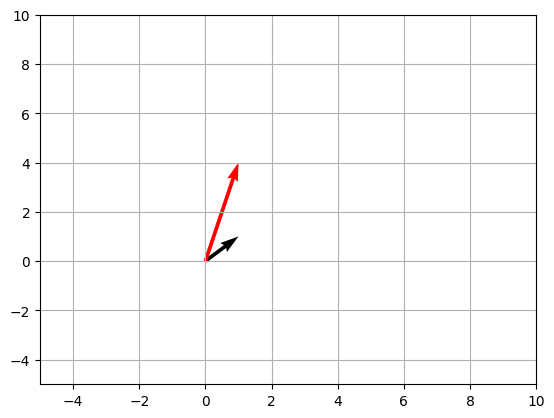

In [85]:
print("Matrix: \n", A)
print("Initial Vector:", v)
print("New Vector:", A @ v) # All other matrix multiplcation works using "@", "np.matmul", or "np.dot"; try it here!

print("Non-Matmul Product: \n", A*c) # "*" performs element wise multiplication between matrices/vectors which differs from an inner product

fig, ax = plt.subplots()
ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='k')
ax.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='r')
ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])
plt.grid()
plt.show()

In [86]:
lamda = symbols('lamda')

character_polynomial = A_sym.charpoly(lamda)
factor(character_polynomial.as_expr())

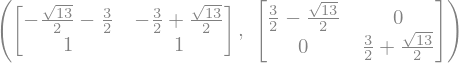

In [87]:
A_sym.diagonalize() # note that an nxn square matrix needs n eigenvalues for it to be diagonalizable, so this might return errors

### Google Example Revisited

<center>
<img src="google_rank.png" width="700">
</center>

Recall that for this given netword of webpages, we wish to find their respective importance score $(x_i)$ where a larger importance score means a page is more valuable. From last talk we worked out that 

$$x_i = \sum_{j \in L_j} \frac{x_j}{n_j} $$

where $x_i$ is the importance score of the pages j that link to page $i$. $n_j$ is the number of *outgoing* links from page $j$ and $L_j = \{1, 2, ..., n\}$ the set of all pages with a link to page $i$. The end goal in this self-referential scheme is, of course, to find these respective importance scores.

Source of the figure and background information can be found [here.](https://www.rose-hulman.edu/~bryan/googleFinalVersionFixed.pdf)

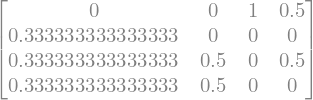

In [88]:
google = Matrix([[0, 0, 1, 1/2], [1/3, 0, 0, 0], [1/3, 1/2, 0, 1/2], [1/3, 1/2, 0 , 0]])

google

In [89]:
p = google.charpoly(lamda)

factor(p.as_expr())

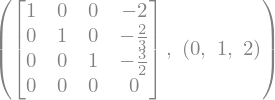

In [90]:
new_rational = Matrix([[-1, 0, 1, 1/2], [1/3, -1, 0, 0], [1/3, 1/2, -1, 1/2], [1/3, 1/2, 0 , -1]]).applyfunc(nsimplify)

new_rational.rref(simplify = True)

We use the flag `.applyfunc(nsimplify)` since there is floating point error associated with the rref procedure. Without the flag, an incorrect result was returned. A StackExchange article describing the issue can be found [here.](https://stackoverflow.com/questions/64565668/sympy-error-on-calculating-reduced-echelon-form-of-matrix)



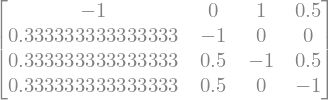

In [91]:
new = google - eye(4)
new
# new.rref() # this result is INCORRECT
# new.nullspace() # this result is also INCORRECT

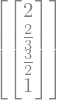

In [92]:
google_nullspace = new_rational.nullspace()
google_nullspace

In [93]:
new_null = np.array(google_nullspace).astype(np.float64)

print("Unnormalized Importance Vector: \n",new_null)
print("Normalized Importance Vector: \n", new_null/np.sum(new_null)) # we see A > C > D > B

Unnormalized Importance Vector: 
 [[[2.        ]
  [0.66666667]
  [1.5       ]
  [1.        ]]]
Normalized Importance Vector: 
 [[[0.38709677]
  [0.12903226]
  [0.29032258]
  [0.19354839]]]


## $\S 3$: Singular Value Decomposition *

SVD is a factorization of some matrix $\hat{A}$ that works even if $\hat{A}$ is not symmetric nor square:

$$ \hat{A} = \hat{U} \hat{\Sigma} \hat{V}^T $$

$\hat{A}$ = $m \times n$ matrix with **singular values** $\sigma_1 \geq \sigma_2 \geq ... \geq \sigma_n \geq 0$

$\hat{U}$ = $m \times m$ orthogonal matrix 

$\hat{V}$ = $n \times n$ orthogonal matrix 

$\hat{\Sigma}$ = $m \times n$ diagonal matrix whose $ith$ diagonal entry is the $ith$ singular value, $\sigma_i \equiv \sqrt{\lambda_i}$ where $\lambda_i$ is an eigenvalue of $\hat{A}^T \hat{A}$

### Find the SVD **

- Step 1: Compute $\hat{A}^T \hat{A}$ to create a square matrix before finding the eigenvalues (**Note.** multiplying a matrix by its transpose creates a symmetric matrix, which through linear algebra, can always be diagonalized. A symmtric matrix is defined as $\hat{A} = \hat{A}^T$).
    - Ex. $\hat{A}_{ij} \longrightarrow \hat{A}^{T}_{ij} = \hat{A}_{ji}$ thus we see $\hat{A}^T \hat{A} = \hat{B}_{ii}$. To show how things will be symmetric, let's consider a $3 \times 2 \cdot 2 \times 3 = 3 \times 3$:

    $$ \begin{bmatrix} 
    x_a & x_d \\
    x_b & x_e \\
    x_c & x_f
    \end{bmatrix} 
    \begin{bmatrix} 
    x_a & x_b & x_c \\
    x_d & x_e & x_f
    \end{bmatrix} = 
    \begin{bmatrix} 
        x_a \cdot x_a + x_d \cdot x_d & \{{x_a \cdot x_b + x_d \cdot x_e}\} & ({x_a \cdot x_c + x_d \cdot x_f}) \\
        \{{x_b \cdot x_a + x_e \cdot x_d}\} & x_b \cdot x_b + x_e \cdot x_e & [{x_b \cdot x_c + x_e \cdot x_f}] \\
        ({x_c \cdot x_a + x_f \cdot x_d}) & [{x_c \cdot x_b + x_f \cdot x_e}] & x_c \cdot x_c + x_f \cdot x_f \\
    \end{bmatrix} 
    $$
    Here, the `{ }`, `( )`, and `[ ]` are used to visually group elements of the matrix that would be flipped during a transpose, showing the result is indeed symmetric.

- Step 2: Find the columns of V which are orthonormal eigenvectors; the ith column of V is equal to $\hat{A}^T \hat{A} v_i = \sigma_i^2 v_i$

- Step 3: Find the columns of U where the ith column is equal to $\sigma_i^{-1} \hat{A} v_i$

A thorough, instructional resource can be found [here.](https://math.berkeley.edu/~hutching/teach/54-2017/svd-notes.pdf)


(677, 1024, 3)


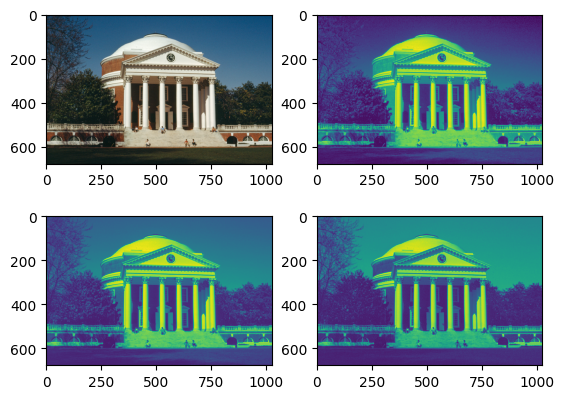

Red - Green: [[225 220 243 ... 189 193 217]
 [234 237 227 ... 190 187 195]
 [235 218 231 ... 190 188 189]
 ...
 [245 251 236 ...   0   9 255]
 [243 237 239 ... 247 242 245]
 [248 254 238 ... 250 253 253]]
Red - Blue: [[196 194 234 ... 146 150 174]
 [211 207 197 ... 140 136 150]
 [206 197 211 ... 138 143 144]
 ...
 [243 255 235 ...  10  18   7]
 [252 243 245 ...  10 255   5]
 [246 255 238 ... 252   4   4]]
Green - Blue: [[227 230 247 ... 213 213 213]
 [233 226 226 ... 206 205 211]
 [227 235 236 ... 204 211 211]
 ...
 [254   4 255 ...  10   9   8]
 [  9   6   6 ...  19  13  16]
 [254   1   0 ...   2   7   7]]


In [94]:
from matplotlib.image import imread 

rotunda = imread("tundy.jpeg")
print(rotunda.shape)

red_channel = rotunda[:, :, 0]
green_channel = rotunda[:, :, 1]
blue_channel = rotunda[:, :, 2]

fig, ax = plt.subplots(2, 2)

ax[0][0].imshow(rotunda)
ax[0][1].imshow(red_channel)
ax[1][0].imshow(green_channel)
ax[1][1].imshow(blue_channel)
plt.show()

print("Red - Green:", red_channel - green_channel)
print("Red - Blue:", red_channel - blue_channel)
print("Green - Blue:", green_channel - blue_channel)

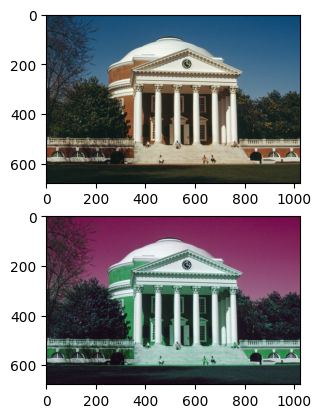

In [95]:
fig, ax = plt.subplots(2)

ax[0].imshow(rotunda)
ax[1].imshow(np.dstack((blue_channel, red_channel, green_channel))) # play around with the order; red, green, blue will produce the original image
plt.show()

### Reduced SVD

As a picture, what we'll do in the next few cells can be visualized with this image:

<center>
<img src="svd.png" width="300">
</center>

What this graphically shows is by taking an increasing amount of significant features, we can more closely "recover" the original image. The goal here would then be what is the **fewest** number of features we need to recreate the initial set of data, in this case the image. This general idea of decreasing the number of inputs is called **dimensionality reduction** and can be found not only in image compression, but machine learning as well. In the case of ML, dimensionality reduction can help make processing data faster as inputs that contribute less to the outputs can be ignored, thus decreasing the amount of work done by the model. 

As an analogy: suppose there is a team of 10 workers that build cars. If 5/10 workers do 90% of the work, it can be assumed that cutting the rest wouldn't lead to a drastic decrease in efficiency. Similarly in ML models, if majority of the output data is informed by a few input variables, there's little merit in considering all of the features. There is likely diminishing returns at some point, and SVD can help you find it.

(677, 677)
(677,)
(677, 1024)


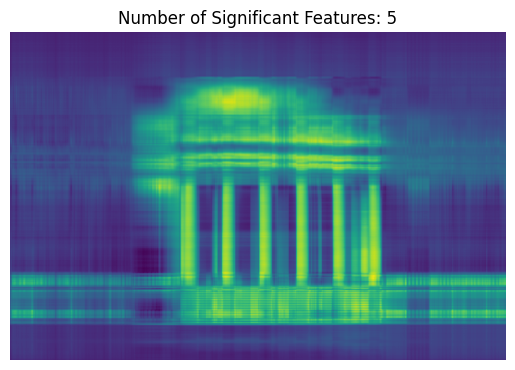

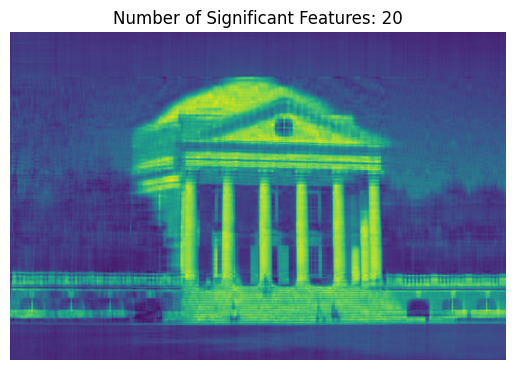

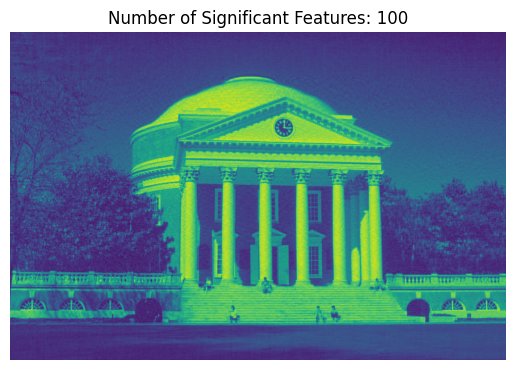

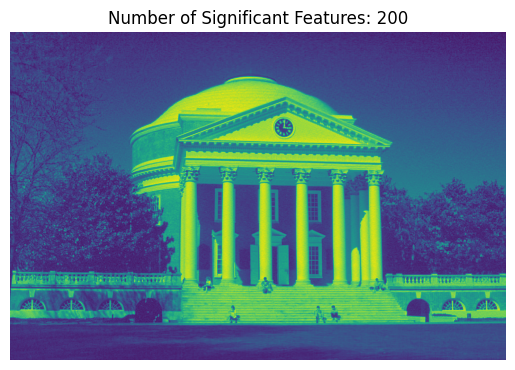

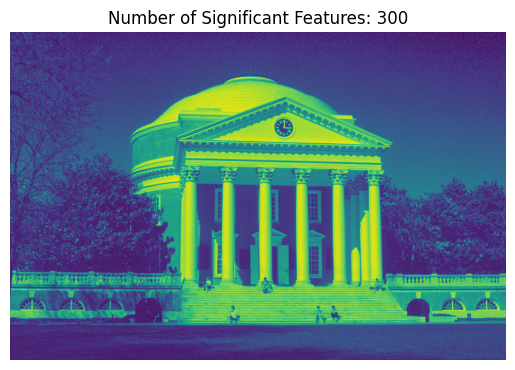

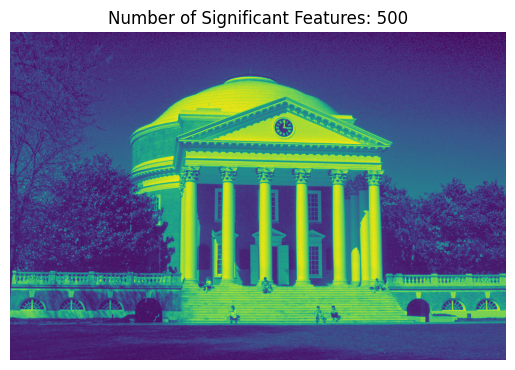

In [96]:
Ur, Sr, VTr = np.linalg.svd(rotunda[:, :, 0], full_matrices=False) # find the SVD of the red channel
print(Ur.shape)
print(Sr.shape)
print(VTr.shape)

Sr = np.diag(Sr)

# i = 100
# print(np.max(Ur[:, :i] @ Sr[0:i, :i] @ VTr[:i, :]))

for i in(5, 20, 100, 200, 300, 500):
    tundy_red = Ur[:, :i] @ Sr[0:i, :i] @ VTr[:i, :]
    plt.imshow(tundy_red)
    plt.title("Number of Significant Features: "+str(i))
    plt.axis('off')
    plt.show()

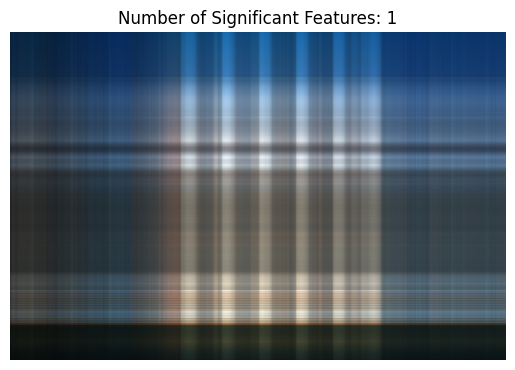

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


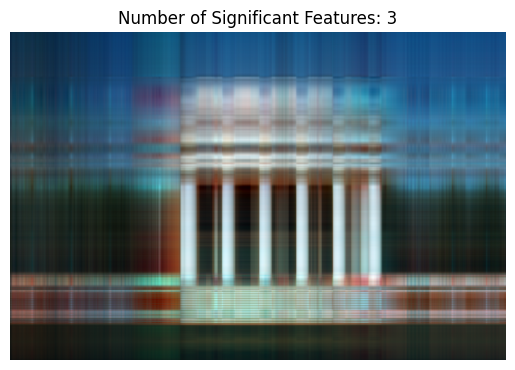

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


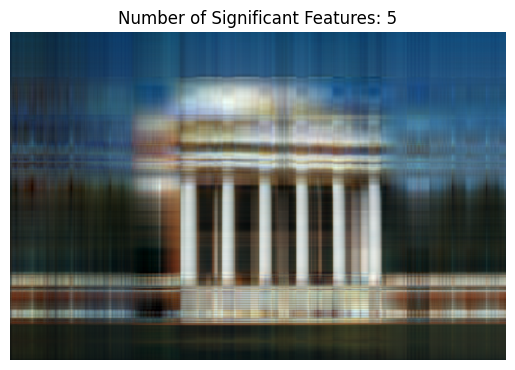

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


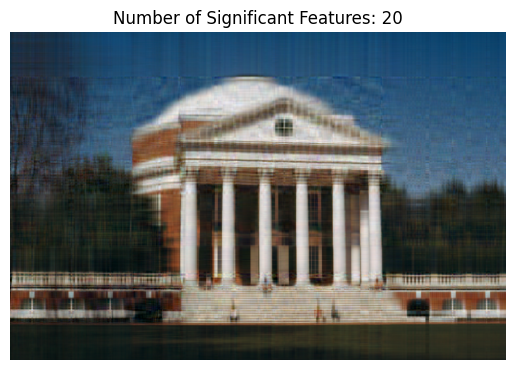

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


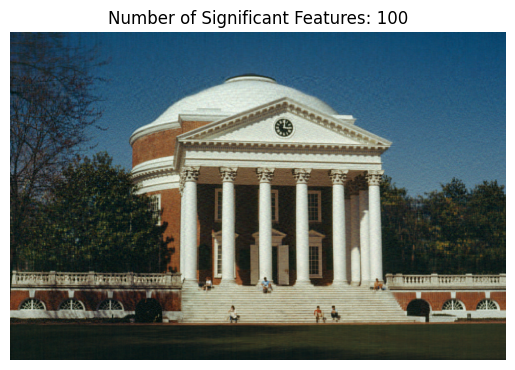

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


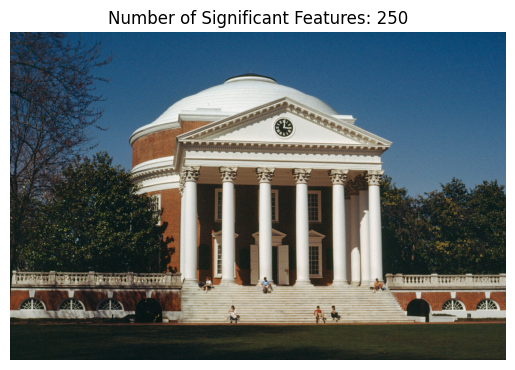

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


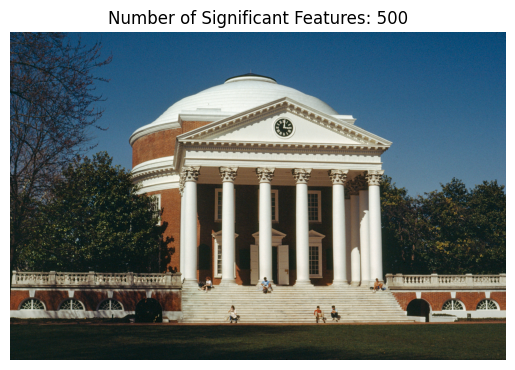

In [97]:
# Let's generalize the above procedure to recover full color images as well

Ur, Sr, VTr = np.linalg.svd(rotunda[:, :, 0], full_matrices=False) # find the SVD of the red channel
Ug, Sg, VTg = np.linalg.svd(rotunda[:, :, 1], full_matrices=False) # find the SVD of the green channel
Ub, Sb, VTb = np.linalg.svd(rotunda[:, :, 2], full_matrices=False) # find the SVD of the blue channel

Sr = np.diag(Sr)
Sg = np.diag(Sg)
Sb = np.diag(Sb)


for i in(1,3, 5, 20, 100, 250, 500):
    tundy_red = Ur[:, :i] @ Sr[0:i, :i] @ VTr[:i, :]
    tundy_green = Ug[:, :i] @ Sg[0:i, :i] @ VTg[:i, :]
    tundy_blue = Ub[:, :i] @ Sb[0:i, :i] @ VTb[:i, :]
    plt.imshow(np.dstack((tundy_red/np.max(tundy_red), tundy_green/np.max(tundy_green), tundy_blue/np.max(tundy_blue)))) # max value of matrix element might exceed 255, hence we scale 
    plt.title("Number of Significant Features: "+str(i))
    plt.axis('off')
    plt.show()

If you wanted to see the contribution of each singular value to the "accuracy" of the approximated image, we could take the cumulative sum along each row and divide it by the sum of all singular values. As the cumulative sum approaches the sum of all values, the ratio approaches 1.0 meaning 100% accuracy. To explain a bit more, recall that the matrix housing the singular values, $\hat{S}$ is diagonal:

$$ \hat{S} = \begin{bmatrix}
    \sigma_1 & 0 & 0 & ... & 0 \\
    0 & \sigma_2 & 0 & ... & 0 \\
    0 & 0 & \sigma_3 & ... & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & ... & \sigma_r
\end{bmatrix} $$
When considering the *cumulative sum*, we see that the sum over the first row will only return $\sigma_1$ since every other element is 0. For the first two rows, we'll get $\sigma_1 + \sigma_2$. The first three rows, $\sigma_1 + \sigma_2 + \sigma_3$, and this trend will hold for all *r* rows.

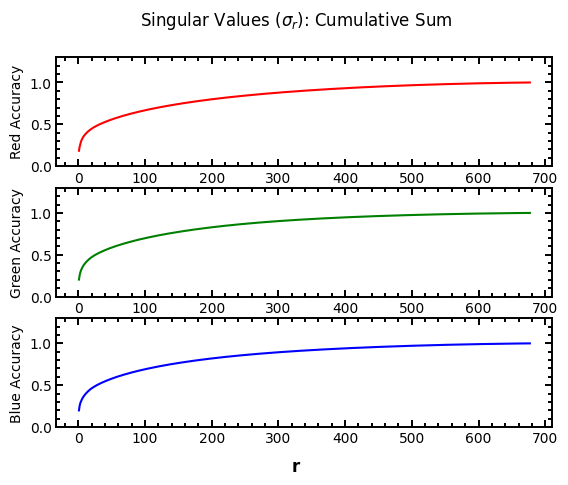

In [98]:
from matplotlib.ticker import AutoMinorLocator

r_range = np.arange(1, Sr.shape[0] + 1, 1)

red_contribution = (np.cumsum(Sr) / np.sum(Sr)).reshape(Sr.shape[0], Sr.shape[0])
green_contribution = (np.cumsum(Sg) / np.sum(Sg)).reshape(Sg.shape[0], Sg.shape[0])
blue_contribution = (np.cumsum(Sb) / np.sum(Sb)).reshape(Sb.shape[0], Sb.shape[0])

label_set = ["Red", "Green", "Blue"]

fig, ax = plt.subplots(3)

ax[0].plot(r_range, red_contribution[:, -1], color = 'red', label = "red")
ax[0].set_ylabel(r'Red Accuracy')
ax[1].plot(r_range, green_contribution[:, -1], color = 'green', label = "green")
ax[1].set_ylabel(r'Green Accuracy')
ax[2].plot(r_range, blue_contribution[:, -1], color = "blue", label = "blue")
ax[2].set_ylabel(r'Blue Accuracy')

for j in range(3):
    ax[j].tick_params(bottom=True, top=True, left=True, right=True)
    ax[j].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)

    ax[j].tick_params(axis="x",direction = "in",length=5)
    ax[j].tick_params(axis="y",direction="in",length=5)

    for axis in ['top','bottom','left','right']:
        ax[j].spines[axis].set_linewidth(1.4)

    ax[j].tick_params(width=1.4)
    ax[j].xaxis.set_minor_locator(AutoMinorLocator())
    ax[j].tick_params(top=True, which='minor', length=3,direction='in',width = 1.4)
    ax[j].yaxis.set_minor_locator(AutoMinorLocator())
    ax[j].tick_params(left=True,right = True, which='minor', length=3,direction='in',width = 1.4)
    ax[j].set_ylim(0, 1.3)


fig.supxlabel(r'$\bf{r}$')
fig.suptitle(r"Singular Values ($\sigma_r$): Cumulative Sum")
plt.show()

In [99]:
print("Red Contribution: \n", red_contribution)
print("Green Contribution: \n", green_contribution)
print("Blue Contribution: \n", blue_contribution)

Red Contribution: 
 [[0.18348015 0.18348015 0.18348015 ... 0.18348015 0.18348015 0.18348015]
 [0.18348015 0.22981499 0.22981499 ... 0.22981499 0.22981499 0.22981499]
 [0.22981499 0.22981499 0.2633958  ... 0.2633958  0.2633958  0.2633958 ]
 ...
 [0.99975336 0.99975336 0.99975336 ... 0.99983753 0.99983753 0.99983753]
 [0.99983753 0.99983753 0.99983753 ... 0.99983753 0.99991969 0.99991969]
 [0.99991969 0.99991969 0.99991969 ... 0.99991969 0.99991969 1.        ]]
Green Contribution: 
 [[0.2028367  0.2028367  0.2028367  ... 0.2028367  0.2028367  0.2028367 ]
 [0.2028367  0.25376905 0.25376905 ... 0.25376905 0.25376905 0.25376905]
 [0.25376905 0.25376905 0.28654758 ... 0.28654758 0.28654758 0.28654758]
 ...
 [0.99981246 0.99981246 0.99981246 ... 0.9998763  0.9998763  0.9998763 ]
 [0.9998763  0.9998763  0.9998763  ... 0.9998763  0.99993985 0.99993985]
 [0.99993985 0.99993985 0.99993985 ... 0.99993985 0.99993985 1.        ]]
Blue Contribution: 
 [[0.19877497 0.19877497 0.19877497 ... 0.19877497